## 4.4 Методы интегрального сглаживания
### 4.4.1. Постановка задачи

Часто в ходе физических экспериментов экспериментальные данные представляются в виде 
* Таблиц 
* Сеточных функций $y_i=f(x_i) \pm \varepsilon_i$, где $\varepsilon_i$ - погрешность измерения.

Например, может быть получена следующая зависимость:

In [57]:
import math
print('x_i,             y_i')
for i in range(1,6):
    print(i, '     ', math.sin(i))

x_i,             y_i
1       0.8414709848078965
2       0.9092974268256817
3       0.1411200080598672
4       -0.7568024953079282
5       -0.9589242746631385


Если просто соединить данные экспериментально полученные точки с помощью прямой, то такое приближение для всего процесса будет довольно неточным:

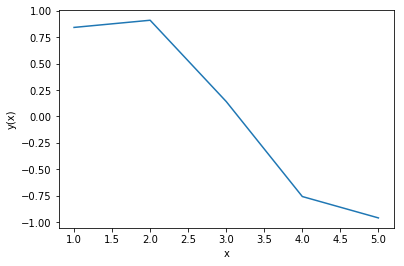

In [59]:
#Импортируем один из пакетов Matplotlib
import pylab
#Импортируем пакет со вспомогательными функциями
from matplotlib import mlab
# Шаг между точками
dx = 1

#Создадим список координат по оси 
#X на отрезке [-xmin; xmax], включая концы
xlist = mlab.frange (1, 5, dx)

# Вычислим значение функции в заданных точках
ylist = [math.sin(x) for x in xlist]

#Нарисуем одномерный график
pylab.plot(xlist, ylist)
pylab.xlabel('x')
pylab.ylabel('y(x)')

#Покажем окно с нарисованным графиком
pylab.show()

Положим, что полученная таблица является реализацией эмпирической гладкой зависимости

$\widetilde{f}_m(x, \overline{a})$ с неизвестным параметром $\overline{a}$, который в общем случае является вектором размерности $m+1$:

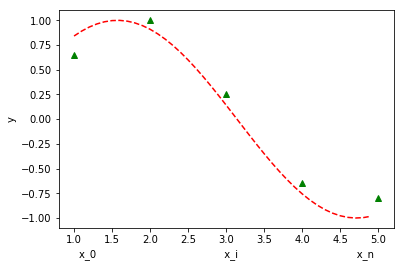

In [61]:
import numpy as np
import matplotlib.pyplot as plt

t1 = np.arange(1., 5., 0.1)
t2 = np.array([1, 2, 3, 4, 5])
t2_2 = np.array([0.65, 1, 0.25, -0.65, -0.8])

plt.plot(t1, np.sin(t1), 'r--', t2, t2_2, 'g^')
plt.ylabel('y')
plt.xlabel('x_0                                         x_i                                      x_n')
plt.show()

где красный график отражает сглаженную зависимость $\widetilde{f}_m(x, \overline{a})$, а зелёный - некоторые табличные данные.

Для определения данной сглаженной зависимости можно использовать разные формы её записи и использовать разные условия согласования $\widetilde{f}_m(x, \overline{a})$ с исходной функцией $y_i=f(x_i) \pm \varepsilon_i$.

Удобно представить зависимость в виде обобщенного многочлена:

$$\widetilde{f}_m(x, \overline{a}) = \sum\limits_{j=0}^{m}a_j\phi_j(x)=a_0\phi_0(x)+a_1\phi_1(x)+...+a_m\phi_m(x) \tag{4.43}         $$
где $\overline{a}$ - вектор неизвестных коэффициентов, $\{\phi_j\}$ - система базисных функций. 

Базисными функциями могут выступать:
* Степенные $\{\phi_j\} = \{x^j\}$
* Многочлены Чебышева
* Тригонометрические $\{\phi_j\} = \{\cos jx\}$

Методами сглаживания могут выступать (более подробно о них поговорим далее):
* Метод наименьших квадратов
* Метод интегрального приближения (также известный как "Метод наилучшего интегрального приближения")

#### Постановка задачи о нахождении сглаживающих многочленов методом наименьших квадратов

Пусть на множестве $\Omega = [a,b]$ задана сетка $$\Omega_n = \{x_i, i=\overline{0,n}\},$$ определяемая $n+1$ точкой, т.е. $x_0, x_1, x_2,...,x_n$, а на сетке задана сеточная функция $$y_i=f(x_i),$$
где $i=\overline{0,n}$.

Предполагается, что функция получена в ходе некоторого эксперимента с погрешностью $\varepsilon_i$.
В качестве сглаживающей функции будет использоваться многочлен 4.43 со степенью, удовлетворяющей условию $0 \leq m \leq n$.

Требуется найти такие коэффициенты $a_0, a_1, a_2,...,a_m$, при которых выполняется интегральное условие согласования:

$$ \delta_m(\overline{a}) = \sqrt{\frac{1}{1+n}\sum\limits_{i=0}^{n} [\widetilde{f}_m(x, \overline{a}) - f_i]^2} \rightarrow \min\limits_{\overline{a}},$$
т.е. такой вектор $\overline{a}$, который обеспечивает минимум среднеквадратичной погрешности $ \delta_m(\overline{a})$.


Ключевые особенности сглаживания данного типа в отличие от решения задачи интерполяции:
* Интерполяция - точечный метод. Как известно, Задача интерполяции – найти функцию $F(x)$, принимающую в точках $x_i$ те же значения $y_i$. Т.е. условие интерполяции имеет вид $F(x_i) = y_i$. Рассматриваемые же здесь методы не требуют точного удовлетворения функциональных условий, а требуют выполнения соответствия $\widetilde{f}_m(x, \overline{a})$ и $y_i=y(x_i)$ в среднем.
* Подразумевается, что исходная функция получена в ходе некоторого эксперимента с ненулевой погрешностью.
* Количество точек $n$, в которых задана исходная функция, значительно выше степени многочлена $m$. Таким образом, между ними нет строгого сооветствия, как в интерполяции.

#### Постановка задачи о нахождении сглаживающих многочленов методом интегрального приближения

Пусть на множестве $\Omega = [a,b]$ задана сетка $$\Omega_{m+1} = \{x_i, i=\overline{0,m+1}\},$$
причём $x_0=a<x_1<x_2<...<x_{m+1} = b.$ 

Данная сетка, определяемая $m+2$ несовпадающими узлами, порождает систему из $m+1$ частичных отрезков $[x_i, x_{i+1}], i = i=\overline{0,m}$

Способы задания сеточной функции на данной сетке:
1. На каждом частичном отрезке сетки задаётся величина интеграла $I_i^{i+1}$
2. На частичных отрезках с фиксированным левым узлом $[x_0, x_{1}], [x_0, x_{2}], ..., [x_0, x_{m+1}]$ задаются интегралы $I_0^{i+1}$
3. Задание сеточной функции её значениями $y_i=f(x_i), i=\overline{0,m+1}$, которые известны с погрешностями $\varepsilon_i$. В данном случае вычисляются интегралы $I_i^{i+1},i=\overline{0,m} $ и $ I_0^i, i = \overline{1,m+1}$.

В качестве сглаживающей функции, как и в методе наименьших квадратов, используется многочлен 4.43 степени $m$ со степенными базисными функциями. Требуется найти такие коэффициенты $a_0, a_1, a_2,...,a_m$, при которых выполняется интегральное условие согласования:
* Для первого способа задания оно имеет вид: $\int\limits_{x_i}^{x_{i+1}} \widetilde{f}_m(x, \overline{a}) dx = I_i^{i+1},$ где  $ i=\overline{0,m} $
* Для второго способа задания оно имеет вид: $\int\limits_{x_0}^{x_{i}} \widetilde{f}_m(x, \overline{a}) dx = I_0^{i},$ где  $ i=\overline{1,m+1} $

### 4.4.2 Метод наименьших квадратов